# Introduction

My responsibility as a data scientist with a focus on fruit sorting is to use the potential of DNNs to improve the sorting processes at a well-known fruit packing company. I collaborate directly with the company's staff to develop advanced algorithms that improve the accuracy, speed, and scalability of the fruit sorting process by utilizing the power of artificial intelligence and machine learning.

The dataset was taken from kaggel

Importing Libraries

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from sklearn.metrics import confusion_matrix
import seaborn as sns

Defining classes for the dataset

In [2]:
fruits=["Apricot","Avocado","Blueberry","Hazelnut","Lychee","Maracuja"]

Importing all of the available fruit photos for training. There are various folders for each class of fruit present. Each image concurrently receives labels along with its attributes.

In [3]:
train_set = []
directory="/content/drive/MyDrive/Fruits/Train"
for i in fruits:
    fruit_path = os.path.join(directory,i)
    class_label=fruits.index(i)
    for j in os.listdir(fruit_path):
        #print(j)
        image = cv2.imread(os.path.join(fruit_path,j))
        image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
        train_set.append([image,class_label])


Importing all of the available fruit photos for testing. There are various folders for each class of fruit present. Each image concurrently receives labels along with its attributes.

In [4]:
test_set = []
directory="/content/drive/MyDrive/Fruits/Test"
for i in fruits:
    fruit_path = os.path.join(directory,i)
    class_label=fruits.index(i)
    for j in os.listdir(fruit_path):
        #print(j)
        image = cv2.imread(os.path.join(fruit_path,j))
        image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
        test_set.append([image,class_label])

Creating training and test lists with features and target labels

In [5]:
X_train=[]
Y_train=[]
for feat,label in train_set:
    #print(feat.shape)
    X_train.append(feat)
    Y_train.append(label)

X_test=[]
Y_test=[]
for feat,label in test_set:
    X_test.append(feat)
    Y_test.append(label)

Displaying one of the images from the dataset

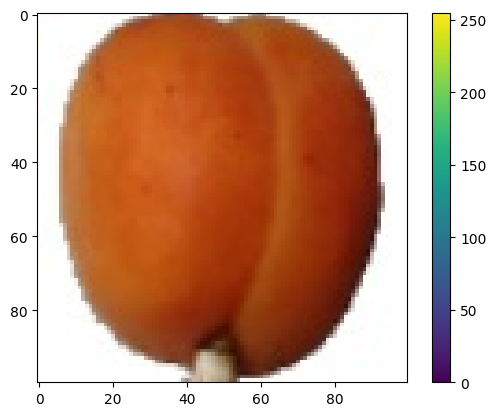

In [6]:
plt.figure()
plt.imshow(X_train[21])
plt.colorbar()
plt.grid(False)
plt.show()

Displaying one image from every class from the dataset

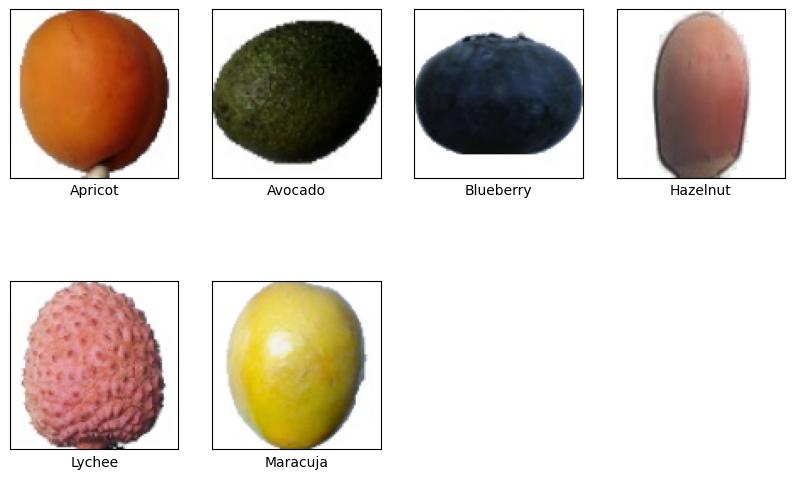

In [7]:
j = 15
plt.figure(figsize=(10,10))
for i in range(6):
    plt.subplot(3,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[j], cmap=plt.cm.binary)
    j = j+420
    plt.xlabel(fruits[i])
plt.show()

Converting the lists to numpy arrays and normalising the image data

In [8]:
X_train = np.array(X_train,dtype = list)


In [9]:
X_test = np.array(X_test,dtype = list)

In [10]:
X_train=X_train/255

In [11]:
X_test = X_test/255

In [12]:
X_test.shape


(950, 100, 100, 3)

In [14]:
from keras.utils import to_categorical
Y_train=to_categorical(Y_train,num_classes=0)
Y_test=to_categorical(Y_test,num_classes=0)

Converting the content of the array into integers

In [16]:
X_train=np.asarray(X_train).astype(np.int)

Y_train=np.asarray(Y_train).astype(np.int)

<ipython-input-16-d83217aaa442>:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_train=np.asarray(X_train).astype(np.int)
<ipython-input-16-d83217aaa442>:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.2

In [17]:
X_test=np.asarray(X_test).astype(np.int)

Y_test=np.asarray(Y_test).astype(np.int)

<ipython-input-17-c05ca846ce27>:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_test=np.asarray(X_test).astype(np.int)
<ipython-input-17-c05ca846ce27>:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20;

Constructing a pipeline for a DNN for classification

In [21]:
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D
from keras.optimizers import Adam


model=Sequential()
model.add(Conv2D(filters=8,kernel_size=(3,3),padding="Same",activation="relu",input_shape=(100,100,3)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.15))

model.add(Conv2D(filters=16,kernel_size=(3,3),padding="Same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.35))

model.add(Conv2D(filters=32,kernel_size=(3,3),padding="Same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.45))
model.add(Flatten())
model.add(Dense(512,activation="relu"))
model.add(Dropout(0.55))
model.add(Dense(6,activation="softmax"))
#defining optimizer
optimizer=Adam(lr=0.001,beta_1=0.9,beta_2=0.999)
#compile the model
model.compile(optimizer=optimizer,loss="categorical_crossentropy",metrics=["accuracy"])

epochs=10
batch_size=8

In [22]:
model.fit(X_train, Y_train, epochs=10)

Epoch 1/10
79/79 [==============================] - 22s 270ms/step - loss: 0.8931 - accuracy: 0.6520
Epoch 2/10
79/79 [==============================] - 23s 293ms/step - loss: 0.2058 - accuracy: 0.9294
Epoch 3/10
79/79 [==============================] - 21s 263ms/step - loss: 0.0492 - accuracy: 0.9857
Epoch 4/10
79/79 [==============================] - 23s 291ms/step - loss: 0.0141 - accuracy: 0.9980
Epoch 5/10
79/79 [==============================] - 21s 264ms/step - loss: 0.0191 - accuracy: 0.9956
Epoch 6/10
79/79 [==============================] - 24s 303ms/step - loss: 0.0103 - accuracy: 0.9976
Epoch 7/10
79/79 [==============================] - 22s 280ms/step - loss: 0.0087 - accuracy: 0.9980
Epoch 8/10
79/79 [==============================] - 21s 265ms/step - loss: 0.0057 - accuracy: 0.9984
Epoch 9/10
79/79 [==============================] - 23s 291ms/step - loss: 0.0041 - accuracy: 0.9980
Epoch 10/10
79/79 [==============================] - 21s 263ms/step - loss: 0.0076 - accura

Printing the confusion matrix for better understanding of the mode;

In [25]:
y_pred=model.predict(X_test)

30/30 [==============================] - 2s 76ms/step


In [26]:
y_pred_classes=np.argmax(y_pred,axis=1)
y_true=np.argmax(Y_test,axis=1)

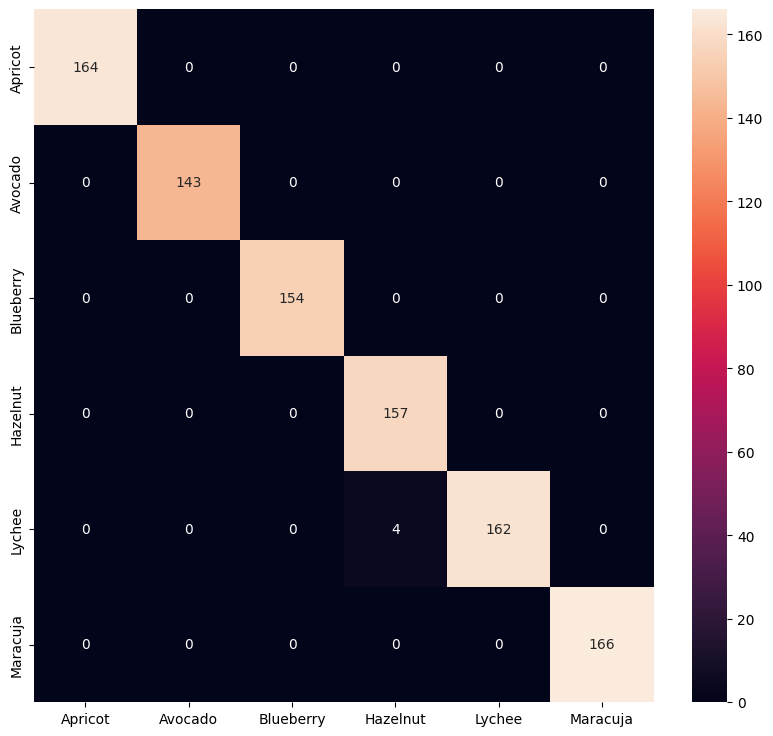

In [27]:
conf_mat2=confusion_matrix(y_true,y_pred_classes)
#plot the con mat
f,ax=plt.subplots(figsize=(10,9))
sns.heatmap(conf_mat2,annot=True,fmt=".0f")
ax.set_xticklabels(fruits)
ax.set_yticklabels(fruits)
plt.show()

# Conclusion:
The classification algorithm was successfully done with a very high accuracy.This would certainly help with the sorting process